In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.metrics import roc_curve, roc_auc_score
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/PGDBA\ Academics/IIM/CDA/

/content/drive/MyDrive/PGDBA Academics/IIM/CDA


In [ ]:
df=pd.read_csv('imputed_data.csv')
df.head()

,Unnamed: 0,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity/Self-Employed,ORGANIZATION_TYPE_Corporate/Private Industry,ORGANIZATION_TYPE_Education/Healthcare/NonProfit,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public/Gov & Emergency
0,0,398301.0,0.0,1.0,0.0,0.0,1.0,0.0,157500.0,276813.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,279370.0,0.0,1.0,0.0,1.0,1.0,1.0,292500.0,900000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,418778.0,0.0,1.0,1.0,0.0,1.0,0.0,180000.0,450000.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,118843.0,0.0,1.0,0.0,0.0,1.0,0.0,135000.0,1078200.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,132944.0,0.0,1.0,0.0,0.0,1.0,0.0,112500.0,1205896.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
df.set_index('SK_ID_CURR', inplace=True)
df.drop(columns ='Unnamed: 0', inplace = True)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Business Entity/Self-Employed,ORGANIZATION_TYPE_Corporate/Private Industry,ORGANIZATION_TYPE_Education/Healthcare/NonProfit,ORGANIZATION_TYPE_Other,ORGANIZATION_TYPE_Public/Gov & Emergency
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
398301.0,0.0,1.0,0.0,0.0,1.0,0.0,157500.0,276813.0,19813.5,256500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
279370.0,0.0,1.0,0.0,1.0,1.0,1.0,292500.0,900000.0,23742.0,900000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
418778.0,0.0,1.0,1.0,0.0,1.0,0.0,180000.0,450000.0,24412.5,450000.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
118843.0,0.0,1.0,0.0,0.0,1.0,0.0,135000.0,1078200.0,31653.0,900000.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
132944.0,0.0,1.0,0.0,0.0,1.0,0.0,112500.0,1205896.5,35388.0,1053000.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


**LOGISTIC REGRESSION**



In [ ]:
y= df['TARGET']
X= df.drop(columns='TARGET')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y)


In [ ]:
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X_train, y_train)

mask = selector.get_support()
selected_features = list(X_train.columns[mask])
print("Top %d features by MI", selected_features)

X_train = pd.DataFrame(selector.transform(X_train), columns = selected_features, index = X_train.index)
X_test = pd.DataFrame(selector.transform(X_test), columns = selected_features, index = X_test.index)

Top %d features by MI ['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NAME_TYPE_SUITE_Others', 'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Secondary / secondary special', 'NAME_FAMILY_STATUS_Married', 'OCCUPATION_TYPE_Unskilled/Service']


In [ ]:
X_train_cons = sm.add_constant(X_train)

logit = sm.Logit(y_train, X_train_cons)
result = logit.fit_regularized(method = 'l1', alpha = 1.0, L1_wt = 0.0)



Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.6060583828121
            Iterations: 227
            Function evaluations: 277
            Gradient evaluations: 227


In [ ]:
X_test_cons = sm.add_constant(X_test)

prob = result.predict(X_test_cons)
thres = 0.5
preds = (prob >= thres).astype(int)

cm = confusion_matrix(y_test, preds, labels = [0,1])

cm_df = pd.DataFrame(cm, index = ['Actual 0', 'Actual 1'], columns = ['Predicted 0', 'Predicted 1'])

print("Confusion Matrix", cm_df)

Confusion Matrix           Predicted 0  Predicted 1
Actual 0         4161         2045
Actual 1         2032         4175


### **RESULTS**

**BOX PLOT**

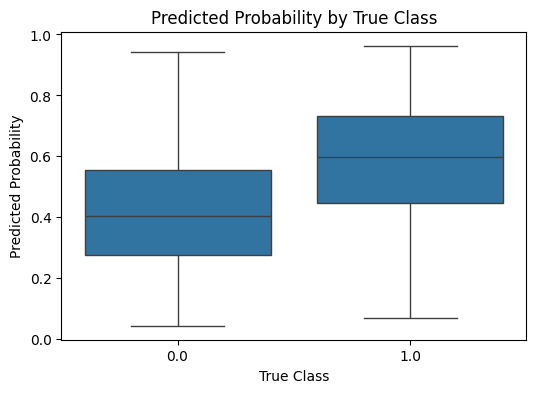

In [ ]:

df_plot = pd.DataFrame(
    {
        'pred_prob':prob,
        'true_class':y_test
    }
)

plt.figure(figsize = (6,4))
sns.boxplot(x = 'true_class', y='pred_prob', data = df_plot)
plt.xlabel('True Class')
plt.ylabel('Predicted Probability')
plt.title('Predicted Probability by True Class')
plt.show()

**ESTIMATES**

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                37237
Model:                          Logit   Df Residuals:                    37216
Method:                           MLE   Df Model:                           20
Date:                Sat, 07 Jun 2025   Pseudo R-squ.:                  0.1260
Time:                        12:49:54   Log-Likelihood:                -22558.
converged:                       True   LL-Null:                       -25811.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                 1.6699      0.101     16.513      0.000       1.472       1.868
CODE_GENDER   

**WALD TEST**

In [ ]:
R = np.eye(len(result.params))[1:,:]
wald_joint = result.wald_test(R)
print(wald_joint)
print("\n Joint Wald Test for coefficients individually equal to zero")
print(f"Wald Statistic: {wald_joint.statistic[0][0]}")
print(f"Degrees of Freedom: {wald_joint.df_denom}")
print(f"\np-value: {wald_joint.pvalue}")

if (wald_joint.pvalue)<0.05:
  print("\nReject Null Hypothesis. ")
else:
  print("\nFail to reject Null Hypothesis")

<Wald test (chi2): statistic=[[5064.39535354]], p-value=0.0, df_denom=19>

 Joint Wald Test for coefficients individually equal to zero
Wald Statistic: 5064.395353543267
Degrees of Freedom: 19

p-value: 0.0

Reject Null Hypothesis. 


**AIC, BIC & Deviance**

In [ ]:
# AIC & BIC
print("AIC: ", result.aic)
print("BIC: ", result.bic)

llf = result.llf
llnull = result.llnull
#Deviance
print("\nDeviance: ", -2*llf)

AIC:  45158.72454905265
BIC:  45337.75077061439

Deviance:  45116.72454905265


**Nagelkerke's R-square**

In [ ]:
n = result.nobs
R2_CS = 1 - np.exp((2/n)*(llnull - llf))
R2_NG = R2_CS / (1 - np.exp((2/n)*llnull))

print(f"Cox_Snell R-square: {R2_CS}")
print(f"Nagelkerke R_Square: {R2_NG}")

Cox_Snell R-square: 0.1602779043665511
Nagelkerke R_Square: 0.21370387253873266


**Percent Correct Classification**

In [ ]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)

print(" PCS:", accuracy )

 PCS: 0.671554015951019


**Hosmer Lemeshow Test**

In [ ]:
def hosmer_lemeshow(y_true, y_pred, g = 10):
  df = pd. DataFrame({'y':y_test, 'p':y_pred})
  df['decile'] = pd.qcut(df['p'],g, labels = False)
  obs = df.groupby('decile')['y'].sum()
  n_i = df.groupby('decile')['y'].count()
  exp = df.groupby('decile')['p'].sum()
  hl_stat = (((obs - exp)**2)/ (exp*(1-exp/n_i))).sum()
  p_value = 1 - stats.chi2.cdf(hl_stat, g-2)
  return hl_stat, p_value

hl_stat, p_value = hosmer_lemeshow(y_test, prob)
print(f"H-L Statistic: {hl_stat}")
print(f"P-Value: {p_value}")

if p_value > 0.05:
  print("\nFail to reject the Null Hypothesis. Concluding the model fits the data well.")
else:
  print("\n Reject the Null Hypothesis. Concluding the model does not fit the data well.")

H-L Statistic: 8.053664872454009
P-Value: 0.42824561299340735

Fail to reject the Null Hypothesis. Concluding the model fits the data well.


**ROC Curve & AUC Score**

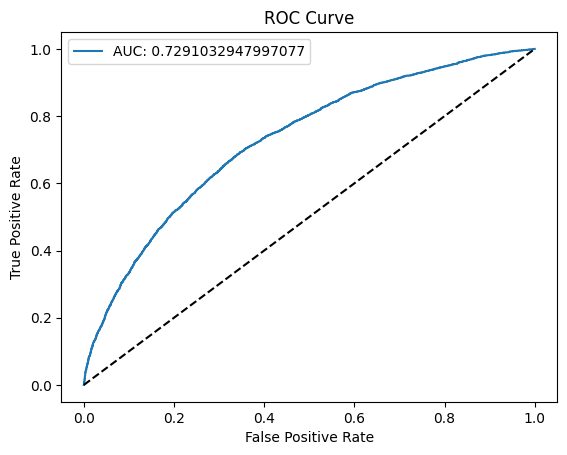

In [ ]:
fpr, tpr, _ = roc_curve(y_test, prob)
auc = roc_auc_score(y_test, prob)
plt.plot(fpr, tpr, label = f"AUC: {auc}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

**SUMMARY**

In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 TARGET   No. Observations:                37237
Model:                          Logit   Df Residuals:                    37216
Method:                           MLE   Df Model:                           20
Date:                Sat, 07 Jun 2025   Pseudo R-squ.:                  0.1260
Time:                        12:49:55   Log-Likelihood:                -22558.
converged:                       True   LL-Null:                       -25811.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                        coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                 1.6699      0.101     16.513      0.000       1.472       1.868
CODE_GENDER   